In [1]:
# Activate Multithreading
using IJulia
installkernel("Julia (16 threads)", env = Dict("JULIA_NUM_THREADS"=>"16"))
using Base.Threads
nthreads()

┌ Info: Installing Julia (16 threads) kernelspec in /Users/jeet/Library/Jupyter/kernels/julia-_16-threads_-1.11
└ @ IJulia /Users/jeet/.julia/packages/IJulia/dR0lE/deps/kspec.jl:105


16

In [2]:
include("functions.jl")
include("plotting_functions.jl")
using LaTeXStrings
using JLD
using DataStructures
include("sq_functions.jl")
include("az_functions.jl")
import Random
using Statistics


In [3]:

N = 8
if N%2 != 0
    println("ERROR: N must be even")
end
# Order of the aztec diamond = N-2. This is for compatision with the literature definition of aztec diamond.
println("Total number of dimer coverings = ", 2^((N-1)*(N-2) ÷ 2)   )
@time az_lat_full = generate_aztec(N)
@time az_lat_spin_full, spin_to_G = generate_spin_lat(az_lat_full, N)


Total number of dimer coverings = 2097152
  0.000675 seconds (1.76 k allocations: 225.469 KiB)
  0.001025 seconds (2.41 k allocations: 388.875 KiB)


(Graph(ComplexF64[-5.5 + 0.0im, -5.0 - 0.5im, -5.0 + 0.5im, -4.5 - 1.0im, -4.0 - 1.5im, -4.5 + 0.0im, -4.0 - 0.5im, -4.5 + 1.0im, -4.0 + 0.5im, -4.0 + 1.5im  …  3.5 + 1.0im, 4.0 + 0.5im, 3.5 + 2.0im, 4.0 + 1.5im, 4.5 - 1.0im, 4.5 + 0.0im, 5.0 - 0.5im, 4.5 + 1.0im, 5.0 + 0.5im, 5.5 + 0.0im], [0 1 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0], [[2, 3], [1, 4, 6], [1, 6, 8], [2, 5, 7], [4, 11, 13], [2, 3, 7, 9], [4, 6, 13, 15], [3, 9, 10], [6, 8, 15, 17], [8, 17, 19]  …  [125, 127, 136, 138], [133, 135, 140, 142], [127, 129, 138], [135, 137, 142], [132, 134, 141], [134, 136, 141, 143], [139, 140, 144], [136, 138, 143], [140, 142, 144], [141, 143]], 144, [6 13 … 142 144; 3 7 … 138 143; 1 4 … 135 140; 2 5 … 136 141], [0;;], [[1, 2], [1, 3], [2, 4], [2, 6], [3, 6], [3, 8], [4, 5], [4, 7], [5, 11], [5, 13]  …  [136, 140], [136, 142], [137, 138], [138, 142], [139, 141], [140, 141], [140, 143], [141, 144], [142, 143], [143, 144]]), [[1, 2], [1, 4], [2, 5], [3, 4], [3, 8], [4, 5], [4, 9], [5, 6], 

In [4]:
az_lat = Graph(az_lat_full.pts, fill(0,1,1), Vector{Vector{Int64}}[], az_lat_full.n, az_lat_full.sq_plaq, fill(0,1,1),Vector{Vector{Int64}}[] )
az_lat_spin = Graph(az_lat_spin_full.pts, fill(0,1,1), Vector{Vector{Int64}}[], az_lat_spin_full.n, az_lat_spin_full.sq_plaq, fill(0,1,1),Vector{Vector{Int64}}[] )
config_hori = generate_config_hori(az_lat_full, az_lat_spin_full, spin_to_G)
config_vert = generate_config_vert(az_lat_full, az_lat_spin_full, spin_to_G)
@time rand_config = az_randomize_config(1000_00, config_hori, az_lat_spin.sq_plaq)
;


  0.004692 seconds (1 allocation: 64 bytes)


In [5]:
# save("./data/aztec_lattices/"*string(N)*".jld", "az_lat", az_lat, "az_lat_spin", az_lat_spin, "spin_to_G", spin_to_G, "N", N,"config_hori",config_hori,"config_vert",config_vert)


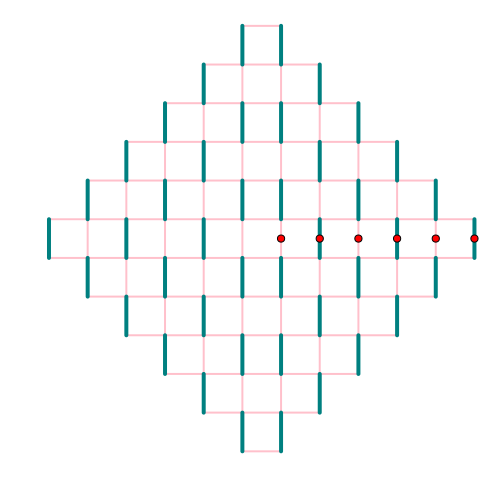

In [6]:
p = plot_generate(500)
# plot!(legend=true)
plot!(grid=false)
plot_edges(p,az_lat_full)
plot!(grid=false, axis=false)
# plot_config(p, rand_config, spin_to_G, az_lat_full)
# plot_config(p, config_hori, spin_to_G, az_lat_full)
config_hori = generate_config_hori(az_lat_full, az_lat_spin_full, spin_to_G)
config_vert = generate_config_vert(az_lat_full, az_lat_spin_full, spin_to_G)

plot_config(p, config_vert, spin_to_G, az_lat_full)
# i = 5
# p1, p2, p3, p4 = az_lat_spin_full.pts[plaqs[:,i]]
# scatter!([real.(p1)], [imag.(p1)], label="1", color=:red, markersize=10)
# scatter!([real.(p2)], [imag.(p2)], label="2", color=:blue, markersize=10)
# scatter!([real.(p3)], [imag.(p3)], label="3", color=:green, markersize=10)
# scatter!([real.(p4)], [imag.(p4)], label="4", color=:purple, markersize=10)
# p = plot_arctic_circle(p, N)

    
origin_pt = -0.5 + 0.0im
origin = index_pts(az_lat_spin_full.pts, origin_pt)
line = findall(x -> (abs(imag(x)) < 1e-5) && ( real(x) > real(origin_pt)), az_lat_spin.pts)

scatter!(real.(az_lat_spin_full.pts[line]), imag.(az_lat_spin_full.pts[line]), color=:red)
# savefig(p ,"./images/paper_images/az_random_config.pdf")

display(p)

# Monte Carlo

## Debugging

In [7]:
# function connected_configs(config::Vector{Bool}, plaq_sq_spin::Matrix{Int64}, nsample::Int64, nmix::Int64 )
#     Random.seed!(1234)
#     @show nsq = size(plaq_sq_spin)[2]
#     @show nspin = length(config)
#     config_list = []
#     for i in 1:nsample
#         for j in 1:nmix    
#             # Returns true if the plaquette is not flippable
#             # Returns false if the plaquette if flippable. Also flips the plaquette in this case
#             # while !plaq_sq_move(config,plaq_sq_spin, nsq )
#             # end
#             plaq_sq_move(config,plaq_sq_spin, nsq )

#         end
#         push!(config_list, copy(config))
#     end
#     return config_list
# end

In [8]:
# config_hori = generate_config_hori(az_lat_full, az_lat_spin_full, spin_to_G)
# config_vert = generate_config_vert(az_lat_full, az_lat_spin_full, spin_to_G)
# nmix = 10000
# nsample = 1000_0
# @time hori_list = connected_configs(config_hori, az_lat_spin_full.sq_plaq, nsample, nmix)
# @time vert_list = connected_configs(config_vert, az_lat_spin_full.sq_plaq, nsample, nmix)
# ;

In [9]:
# scatter(sort(sum(hori_list)./nsample), ylim=(0,1), label="Horizontal")
# p = scatter!(sort(sum(vert_list)./nsample), label="Vertical")
# display(p)
# scatter(sort(sum(key_hori ./ 8)), ylim=(0,1))

In [10]:
# hori_freq = counter(hori_list) 
# prob_hori = []
# key_hori = []
# for (key, value) in hori_freq
#     push!(key_hori, key)
#     push!(prob_hori, value/nsample)
# end


In [11]:
# vert_freq = counter(vert_list) 
# prob_vert = []
# key_vert = []
# for (key, value) in vert_freq
#     push!(key_vert, key)
#     push!(prob_vert, value/nsample)
# end


In [12]:
# scatter(sort(prob_hori))
# scatter!(sort(prob_vert))


## MC

In [13]:
function mc(config::Vector{Bool}, plaq_sq_spin::Matrix{Int64}, line::Vector{Int64}, nsample::Int64, nwait::Int64,fname::String )
    Random.seed!(1234)
    nsq = size(plaq_sq_spin)[2]
    nspin = length(config)

    f = open(fname,"w") 
    for i in 1:nsample
        for j in 1:nwait
            plaq_sq_move(config,plaq_sq_spin, nsq )
        end
        write(f, config[line])
        write(f, "\n")
    end
    close(f)
    return config

end

mc (generic function with 1 method)

In [ ]:
nwait = 1000
nsample = 1000_000

N = 30
loaded_data = load("./data/aztec_lattices/" * string(N) * ".jld")

az_lat = loaded_data["az_lat"]
az_lat_spin = loaded_data["az_lat_spin"]
spin_to_G = loaded_data["spin_to_G"]
config_hori = loaded_data["config_hori"]
config_vert = loaded_data["config_vert"]

# config_hori = generate_config_hori(az_lat, az_lat_spin, spin_to_G)
# config_vert = generate_config_vert(az_lat, az_lat_spin, spin_to_G)

origin_pt = -0.5 + 0.0im
origin = index_pts(az_lat_spin.pts, origin_pt)
line_global = findall(x -> (abs(imag(x)) < 1e-5) && ( real(x) > real(origin_pt)), az_lat_spin.pts)

fnames = ["./data/aztec_vert", "./data/aztec_hori"] .* "_" .* string(N)
starting_config = [config_vert, config_hori]
nt = 2
@threads for i in 1:length(fnames)
    line_local = line_global
    @time new_config,line = mc(starting_config[i], az_lat_spin.sq_plaq, line_local, nsample, nwait, fnames[i])
end


# Post process

In [ ]:
function load_data(fnames::Vector{String}, sizes::Vector{Int64})
    data = [fill(false, 0,0) for _ in 1: length(fnames)]
    nt = 4
    @showprogress for i in 1:length(fnames)
        f = open(fnames[i]) do f
            readlines(f)
        end
        d = conv_to_arr(f[1], sizes[i] );
        data[i] = d
    end
    return data
end
dir = "./data/"

In [ ]:
origin_pt = -0.5 + 0.0im
origin = index_pts(az_lat_spin.pts, origin_pt)
line = findall(x -> (abs(imag(x)) < 1e-5) && ( real(x) > real(origin_pt)), az_lat_spin.pts);

In [ ]:
fnames = ["aztec_hori", "aztec_vert"] .* "_" .* string(N)
arr_list = []

for i in 1:length(fnames)
    f = open(dir .* fnames[i]) do f
        readlines(f)
    end
    arr = conv_to_arr(f[1], length(line) );
    push!(arr_list, arr)
end
arr_hori, arr_vert = arr_list;

In [ ]:
dir .* fnames[1]

In [ ]:
# file = open(dir .* fnames[1],"r")
# file_data = ""
# while !eof(file)
#     c = read(file, Char)
#     file_data = file_data * c
#     # your stuff
# end
# close(file)

In [ ]:
# file_data

In [ ]:

# f = open(dir .* fnames[1]) do f
#     readlines(f)
# end


In [ ]:
# f = open("./data/del/del","w") 
# write(f, "00001")
# close(f)

In [ ]:
# f = open("./data/del/del","r") do f
#     readlines(f)
# end

In [ ]:
# arr_hori

In [ ]:
origin_index = 1
vis_hori = fill(0.0, length(line));
@showprogress for i in 1:length(line)
    vis_hori[i] = vis_from_arr_ij(arr_hori, origin_index, i)
end
vis_vert = fill(0.0, length(line));
@showprogress for i in 1:length(line)
    vis_vert[i] = vis_from_arr_ij(arr_vert, origin_index, i)
end

In [ ]:
plot( xlabel="String length", ylabel="Vison", title="Aztec diamond, log scale")
scatter!(vis_hori, label="Horizontal")
scatter!(vis_vert, label="Vertical")
# plot!(yaxis=:log)

In [ ]:
sum(arr_vert;dims=2)/1000000 .- sum(arr_hori;dims=2)/1000000

# Ergodicity check
1. Start from a configuration, do ring exchanges, count the number of unique dimer coverings generates and make sure that it matches with the theoretical expectation.
2. Calculate the number of flippable plaquettes in each configuration and figud out which configurations have the minimum number of flippable plaquettes. These will be the ordered states for V > J

In [44]:
using LinearAlgebra

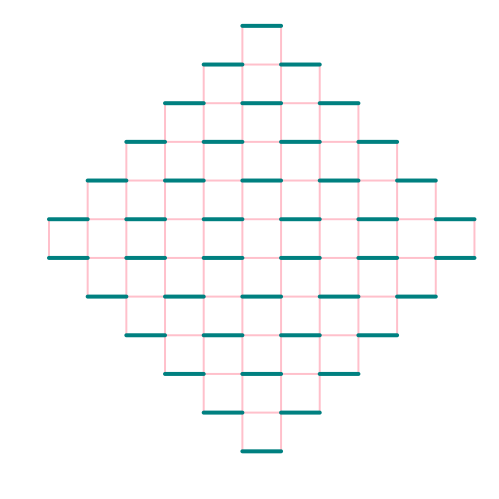

In [45]:
p = plot_generate(500)
plot!(grid=false, axis=false)
plot_edges(p,az_lat_full)
# plot_config(p, rand_config, spin_to_G, az_lat_full)
plot_config(p, config_hori, spin_to_G, az_lat_full)
config_hori = generate_config_hori(az_lat_full, az_lat_spin_full, spin_to_G)

config_vert = generate_config_vert(az_lat_full, az_lat_spin_full, spin_to_G)
display(p)

In [46]:
function generate_configs(initial_config::Vector{Bool}, plaq_sq_spin::Matrix{Int64}, nsample::Int64)
    Random.seed!(1234)
    nsq = size(plaq_sq_spin)[2]
    nspin = length(initial_config)

    config_list = [initial_config]
    for i in 1:nsample
        config = deepcopy(config_list[end])
        while plaq_sq_move(config,plaq_sq_spin, nsq )
                # plaq_sq_move Returns true if the plaquette is not flippable
                # plaq_sq_move Returns false if the plaquette if flippable. Also flips the plaquette in this case
        end
        push!(config_list, config)
    end
    return config_list
end

generate_configs (generic function with 1 method)

In [50]:
config_hori = generate_config_hori(az_lat_full, az_lat_spin_full, spin_to_G)

@time config_list = generate_configs(config_hori, az_lat_spin.sq_plaq, 1000_000_0);

 21.303175 seconds (50.00 M allocations: 5.503 GiB, 65.41% gc time)


In [51]:
# ph = plot_generate(300)
# plot!(grid=false, axis=false)
# plot_edges(ph,az_lat_full)
# plot_config(ph, config_hori, spin_to_G, az_lat_full)

# p1 = plot_generate(300)
# plot!(grid=false, axis=false)
# plot_edges(p1,az_lat_full)
# plot_config(p1, config_list[2], spin_to_G, az_lat_full)

# # p2 = plot_generate(300)
# # plot!(grid=false, axis=false)
# # plot_edges(p2,az_lat_full)
# # plot_config(p2, config_list[4], spin_to_G, az_lat_full)
# plot(ph, p1)

In [52]:
@time unique_configs = unique(config_list);
println(length(unique_configs),"\t expected=", 2^21)

 12.419187 seconds (81 allocations: 116.555 MiB, 19.38% gc time)
2057788	 expected=2097152


In [53]:
# nvert = 84 -> 2^21 configs; verified numerically
# nvert = 40 -> 2^10 configs; verified numerically
# nvert = 12 -> 2^3 configs; verified numerically
# The formula for the number of configurations is 2^(nvert/4)

In [54]:
function nflip(config::Vector{Bool}, plaq_sq_spin::Matrix{Int64}, nsq::Int64)
    nflip = 0
    for i in 1:nsq
        p = plaq_sq_spin[:,i]
        if config[p[1]] != config[p[2]] && config[p[3]] != config[p[4]]
            nflip += 1
        end
    end
    return nflip
end

function generate_nflip_list(unique_configs::Vector{Vector{Bool}}, plaq_sq_spin::Matrix{Int64}, nsq::Int64)
    n_unique = length(unique_configs)
    nsq = size(plaq_sq_spin)[2]
    nflip_list = fill(0,n_unique)
    for i in 1:n_unique
        nflip_list[i] = nflip(unique_configs[i], plaq_sq_spin, nsq)
    end
    return nflip_list
end

generate_nflip_list (generic function with 1 method)

In [56]:
# nsq = size(az_lat_spin.sq_plaq)[2]
# nflip_list = []
# @time for i in 1:length(unique_configs)
#     push!(nflip_list, nflip(unique_configs[i], az_lat_spin.sq_plaq, nsq)  )
# end
@time nflip_list = generate_nflip_list(unique_configs, az_lat_spin.sq_plaq, nsq)
# println(nflip_list)
nmin = minimum(nflip_list)
nmax = maximum(nflip_list)
println("Minimum number of flips = ", nmin)
println("Maximum number of flips = ", nmax)
println("Average number of flips = ", mean(nflip_list))
# print index of the minimum value
minind = argmin(nflip_list)
maxind = argmax(nflip_list)
minind_list = findall(x -> x == nmin, nflip_list)
maxind_list = findall(x -> x == nmax, nflip_list)
println("Number of configurations with minimum number of flips = ", length(minind_list))
println("Number of configurations with maximum number of flips = ", length(maxind_list))
println("Index of minimum number of flips = ", minind)
println("Index of maximum number of flips = ", maxind)


  5.841805 seconds (251.05 M allocations: 11.238 GiB, 35.89% gc time)
Minimum number of flips = 6
Maximum number of flips = 21
Average number of flips = 12.423421168750133
Number of configurations with minimum number of flips = 1730
Number of configurations with maximum number of flips = 2
Index of minimum number of flips = 1
Index of maximum number of flips = 84821


In [57]:
# for N = 8:
# 1. Number of configurations = 2^21
# Minimum number of flips = 6
# Maximum number of flips = 21
# Average number of flips = 12.39453125
# Number of configurations with minimum number of flips = 2074
# Number of configurations with maximum number of flips = 2
# Index of minimum number of flips = 1
# Index of maximum number of flips = 84821

# For N = 6:
# 1. Number of configurations = 2^10
# Minimum number of flips = 4
# Maximum number of flips = 10
# Average number of flips = 6.265625
# Number of configurations with minimum number of flips = 92
# Number of configurations with maximum number of flips = 2
# Index of minimum number of flips = 1
# Index of maximum number of flips = 148

# For N = 4:
# 1. Number of configurations = 2^3
# Minimum number of flips = 2
# Maximum number of flips = 3
# Average number of flips = 2.25
# Number of configurations with minimum number of flips = 6
# Number of configurations with maximum number of flips = 2
# Index of minimum number of flips = 1
# Index of maximum number of flips = 4

# Based on the patter for a general N,
#1. Number of configurations = 2^(nvert/4)
# Minimum number of flips = N-2
# Maximum number of flips = nvert
# Number of configurations with minimum number of flips 
# Number of configurations with maximum number of flips = 2



In [62]:
using JLD

In [ ]:
# @save "./data/paper/max-flip-config-8.jld" N max_flip_config

In [64]:
max_flip_config = unique_configs[maxind];

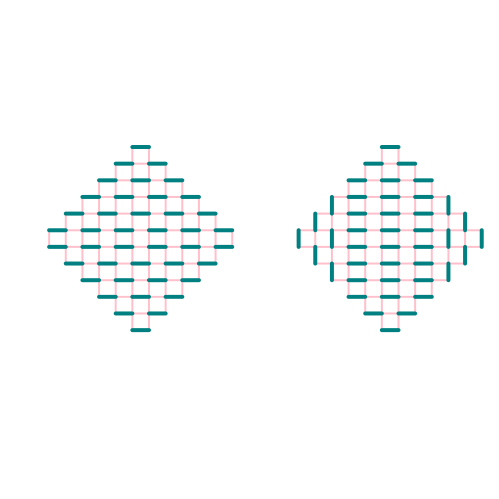

In [58]:
ph = plot_generate(500)
plot!(grid=false, axis=false)
plot_edges(ph,az_lat_full)
plot_config(ph, unique_configs[minind], spin_to_G, az_lat_full)

p1 = plot_generate(500)
plot!(grid=false, axis=false)
plot_edges(p1,az_lat_full)
plot_config(p1, unique_configs[maxind], spin_to_G, az_lat_full)

plot(ph, p1)

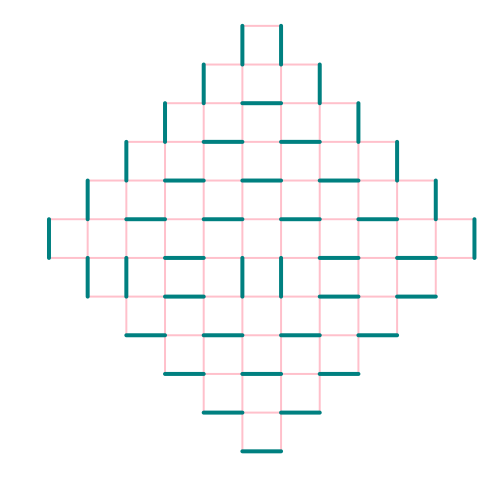

In [59]:
ph = plot_generate(500)
plot!(grid=false, axis=false)
plot_edges(ph,az_lat_full)
plot_config(ph, unique_configs[minind_list[16]], spin_to_G, az_lat_full)
display(ph)

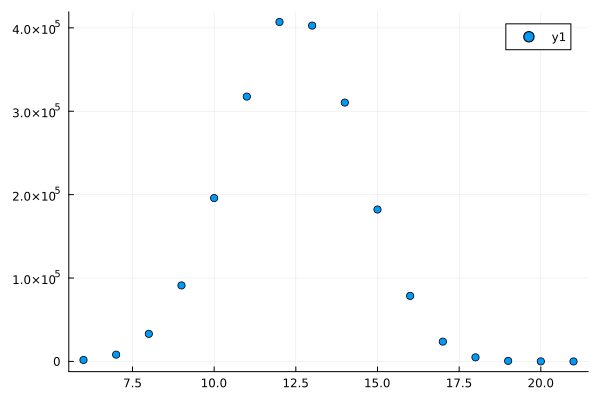

In [60]:
scatter(counter(nflip_list))